In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
from PIL import Image
import matplotlib. pyplot as plt 

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D,Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop



In [ ]:
p_size = 48
folderPath="/kaggle/input/fer-2013/fer-2013/images/"

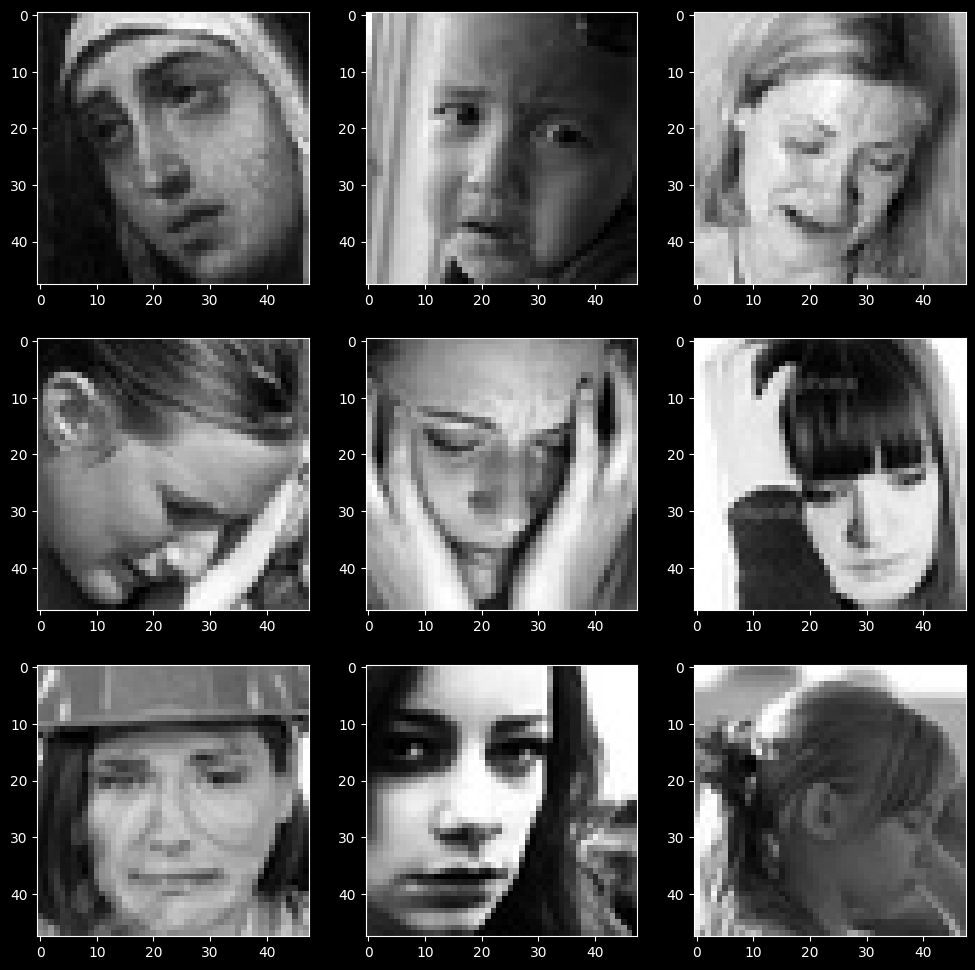

In [ ]:
expression='sad'
targetSize=(p_size,p_size)
plt.style.use('dark_background')
plt.figure(figsize=(12, 12))
plt.rcParams['image.cmap'] = 'gray' 

for i in range(1, 10):
    plt.subplot(3, 3, i)
    img_path = os.listdir(folderPath + "train/" + expression)[i]
    img = Image.open(folderPath + "train/" + expression + "/" + img_path).convert("L")
    plt.imshow(img, cmap='gray')

plt.show()

In [ ]:
batch_size= 128
batch_size=batch_size
datagenTrain= ImageDataGenerator()
datagenVal= ImageDataGenerator()

trainSet = datagenTrain.flow_from_directory(
    folderPath + "train",
    target_size=targetSize,
    color_mode="grayscale",
    batch_size=batchSize,
    class_mode='categorical',
    shuffle=True
)

testSet = datagenVal.flow_from_directory(
    folderPath + "test",
    target_size=targetSize,
    color_mode="grayscale",
    batch_size=batchSize,
    class_mode='categorical',
    shuffle=False
)


In [ ]:
from keras.optimizers import Adam, SGD, RMSprop
noOfClasses= 7
model=Sequential()
#1st CNN Layer
model.add(Conv2D(64,(3,3),padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
#2nd CNN Layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
#3rd CNN Layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
#4th CNN Layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
#Fully Connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#Fully Connected layer 2nd Layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(noOfClasses, activation='softmax'))

opt=Adam(lr=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [114]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
checkpoint=ModelCheckpoint("/kaggle/working/",monitor='val_acc', verbose=1,save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1,
                              restore_best_weights=True)
reduce_learningrate=ReduceLROnPlateau(monitor='val_loss',
                                     factor=0.2,
                                     patience=3,
                                     verbose=1,
                                     min_delta=0.0001)
callbacks_list =[early_stopping,checkpoint]
epochs= 25

In [ ]:
history= model.fit_generator(generator=trainSet,
                            steps_per_epoch= trainSet.n//trainSet.batch_size,
                            epochs=epochs,
                            validation_data=testSet,
                            validation_steps=testSet.n//testSet.batch_size,
                            callbacks=callbacks_list
                            )

/tmp/ipykernel_34/911051170.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(generator=trainSet,


Epoch 1/25
224/224 [==============================] - 777s 3s/step - loss: 2.0021 - accuracy: 0.2329 - val_loss: 1.7589 - val_accuracy: 0.2921
Epoch 2/25
224/224 [==============================] - 779s 3s/step - loss: 1.8459 - accuracy: 0.2809 - val_loss: 1.7658 - val_accuracy: 0.2787
Epoch 3/25
224/224 [==============================] - 779s 3s/step - loss: 1.7485 - accuracy: 0.3279 - val_loss: 1.6829 - val_accuracy: 0.3403
Epoch 4/25
224/224 [==============================] - 781s 3s/step - loss: 1.6661 - accuracy: 0.3581 - val_loss: 1.5787 - val_accuracy: 0.3856
Epoch 5/25
224/224 [==============================] - 775s 3s/step - loss: 1.6085 - accuracy: 0.3799 - val_loss: 1.5199 - val_accuracy: 0.4007
Epoch 6/25
224/224 [==============================] - 779s 3s/step - loss: 1.5509 - accuracy: 0.4025 - val_loss: 1.5130 - val_accuracy: 0.4106
Epoch 7/25
224/224 [==============================] - 778s 3s/step - loss: 1.4926 - accuracy: 0.4286 - val_loss: 1.5777 - val_accuracy: 0.4049

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitlle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss',fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
